In [67]:
'''
@ChiZuo July, 31, 2019
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
path = 'wine-quality/winequality-red.csv'
features = ['fixed acidity', 'volatile acidity', 'citric acid',
           'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates',
           'alcohol', 'quality']
data = pd.read_csv(path, header=None, names=features, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### data.describe() could have a overview of the data

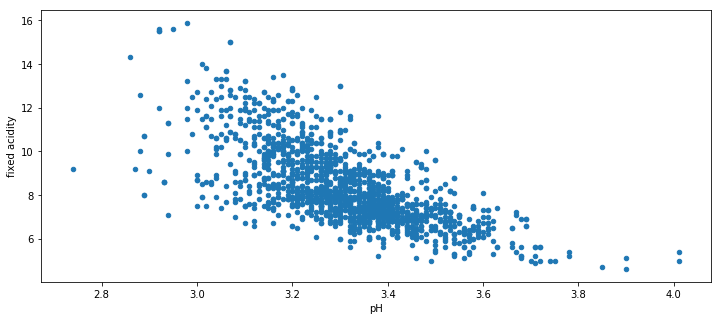

In [95]:
data.plot(kind='scatter', x=features[-4], y=features[0], figsize=(12, 5))
plt.show()
# print(data[features[0]])

### It seems like to be linear through the scatter plot

### Create the cost function first
$$ J\left( \theta \right) = \frac{1}{2m} \sum \limits_{i=1}^{m} \left(h_{\theta}\left(x^{i}\right) - y^{i} \right)^{2}$$

### And the hypothesis function is
$$ h_{\theta}\left(x\right) = \theta_{0} + \theta_{1}{x}_{1}$$

In [71]:
def compute_cost(X, y, theta):
    inner = np.power((X * theta.T -y), 2)
    return np.sum(inner) / 2 / len(X)

### Define the compute_cost function to compute 
$$ \left( h_{\theta}\left(x^i \right) - y^i\right)^2 $$

In [72]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [73]:
print(data.shape)

(1599, 13)


In [74]:
cols = data.shape[1]
rows = data.shape[0]